In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ideas to improve forecasting
1. Segments hours to get the time which the people will use electricity
2. Visualize more on the consumption pattern to see if anything useful.
3. Can try to incorporate demographics details inside maybe
4. Check demand with seasons
5. DO FEATURE SELECTION BECAUSE UNIVARIATE BETTER?????????????????????

### To do
1. Try to figure out the decrease of data in each household (The reason I can think of now is they go on vacation lmao)

### Some references that may be useful
1. https://www.sciencedirect.com/science/article/pii/S2352484722005078 - User behavior

In [2]:
df = pd.read_csv('cleaned_data\\cleaned_df.csv', parse_dates=['tstp'])

OSError: [Errno 22] Invalid argument

In [ ]:
df.columns[-20:]

In [3]:
# columns_desired = ['tstp', 'energy(kWh/hh)', 'LCLid', 'stdorToU', 'Acorn', 'visibility',
#        'windBearing', 'temperature', 'dewPoint', 'pressure',
#        'apparentTemperature', 'windSpeed', 'precipType', 'humidity',
#        'summary', 'Type',
#        'year', 'month', 'day', 'dayofweek_num', 'is_weekend', 'season',
#        'no_work', 'hour', 'at_home']

columns_desired = ['tstp', 'energy(kWh/hh)', 'LCLid', 'stdorToU', 'Acorn', 'visibility',
       'windBearing', 'temperature', 'dewPoint', 'pressure',
       'apparentTemperature', 'windSpeed', 'precipType', 'humidity', 'Type',
       'year', 'month', 'day', 'dayofweek_num', 'is_weekend', 'season',
       'no_work', 'hour', 'at_home']

sampled_df = df[columns_desired]

In [5]:
sampled_df['LCLid'].unique()

array(['MAC003686', 'MAC003281', 'MAC001628', 'MAC005205', 'MAC004280',
       'MAC002751', 'MAC003134', 'MAC003792', 'MAC000695', 'MAC005034',
       'MAC002413', 'MAC000544', 'MAC003903', 'MAC003445', 'MAC000897',
       'MAC002606', 'MAC001313', 'MAC003901', 'MAC004400', 'MAC001124',
       'MAC001660', 'MAC001680', 'MAC003255', 'MAC003729', 'MAC000340',
       'MAC002669', 'MAC003389', 'MAC003248', 'MAC002468', 'MAC000726',
       'MAC005485', 'MAC001814', 'MAC003238', 'MAC000202', 'MAC004729',
       'MAC000664', 'MAC003972', 'MAC001323', 'MAC005439', 'MAC003518',
       'MAC001456', 'MAC000477', 'MAC005511', 'MAC004493', 'MAC002758',
       'MAC003631', 'MAC002463', 'MAC002387', 'MAC000617', 'MAC001072',
       'MAC005344'], dtype=object)

In [4]:
# get one of the household for simplicity

singlehousehold_df_grp = sampled_df.groupby(['LCLid'])
household_ids = sampled_df['LCLid'].unique()

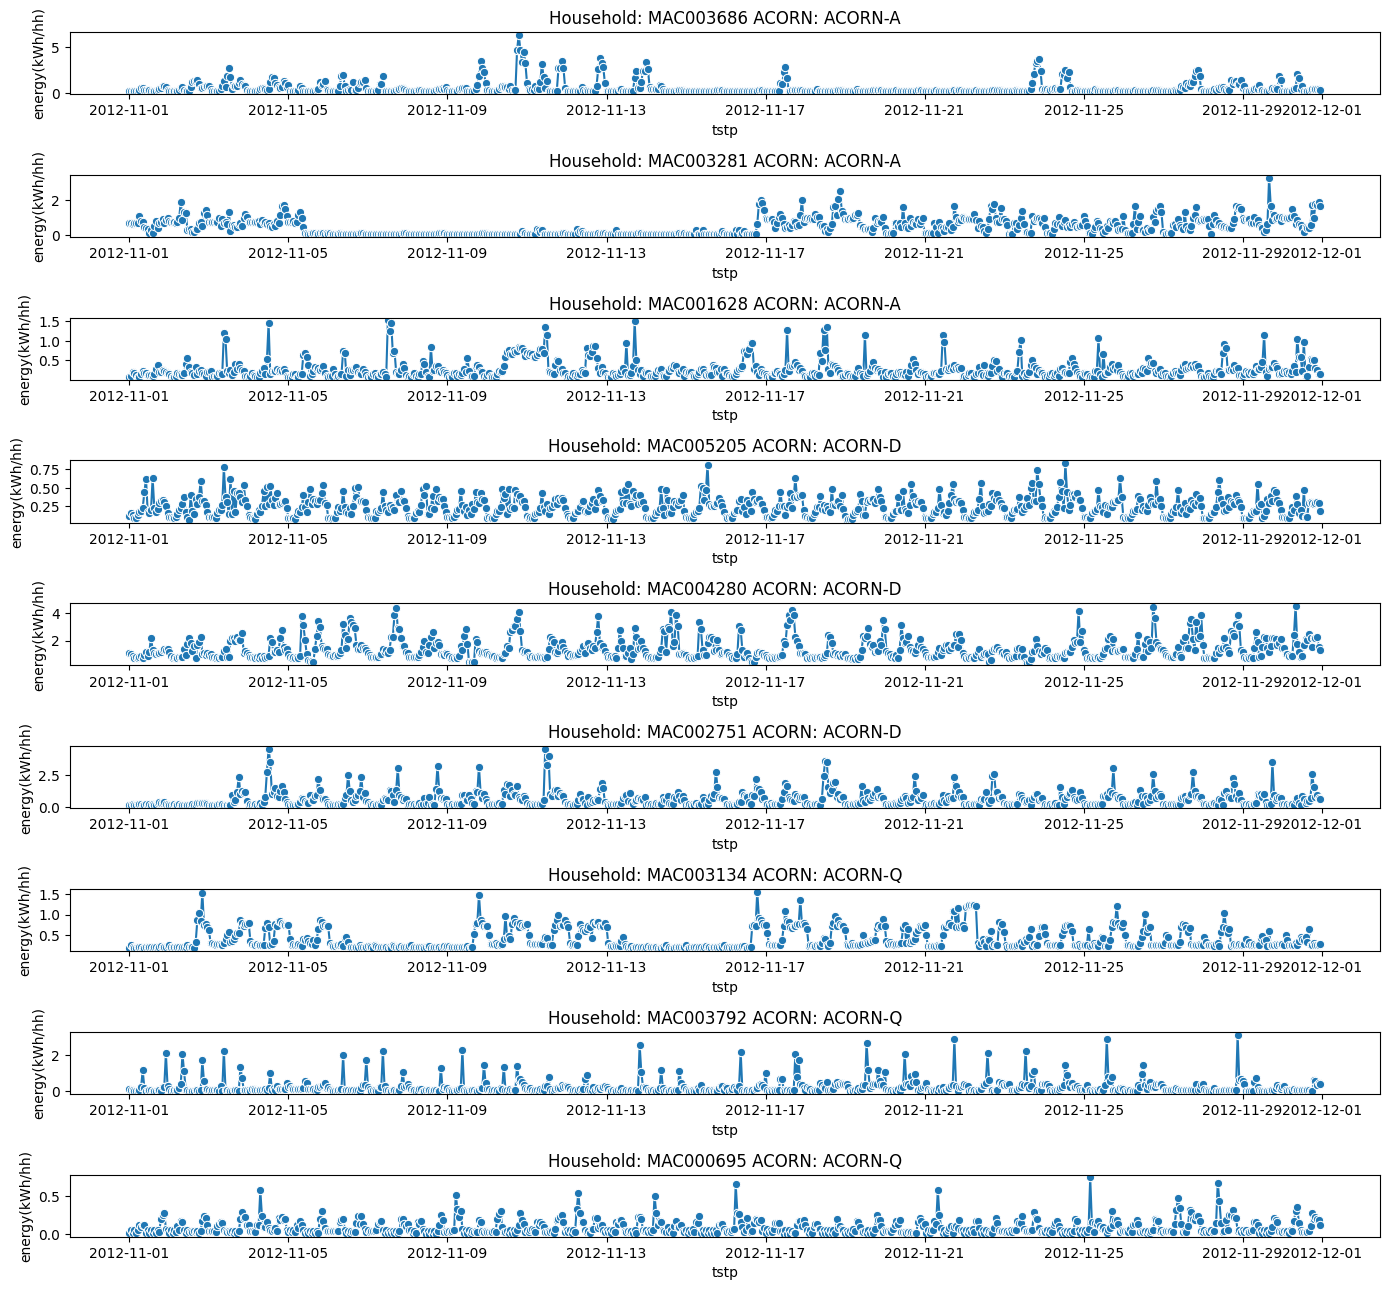

In [130]:
plt.figure(figsize=(14, 14))
n_households = 10

for i in range(1, n_households):
    plt.subplot(n_households, 1, i)
    test = singlehousehold_df_grp.get_group(household_ids[i - 1])
    test = test.loc[(test['year'] == 2012) & (test['month'] == 11)]

    household_id = test['LCLid'].unique()[0]
    acorn_grp = test['Acorn'].unique()[0]
    
    plt.title(f'Household: {household_id} ACORN: {acorn_grp}')
    sns.lineplot(data=test, x='tstp', y='energy(kWh/hh)', marker='o')

plt.tight_layout()
plt.show()

In [5]:
weird_household = singlehousehold_df_grp.get_group('MAC003281')
weird_household.describe()

,energy(kWh/hh),visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity,year,month,day,dayofweek_num,is_weekend,season,no_work,hour,at_home
count,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000
mean,0.391561,11.144854,193.072757,9.951173,6.149160,1012.497107,8.534396,3.989844,0.787751,2012.929256,6.766519,15.738270,2.999437,0.285875,2.812716,0.307123,11.504225,0.583099
std,0.452263,3.131368,91.937259,5.876719,5.155085,11.297546,7.105959,2.092399,0.137852,0.538506,3.864117,8.805972,2.000503,0.451848,1.095166,0.461319,6.921962,0.493066
min,0.039000,0.270000,0.000000,-3.860000,-8.920000,975.740000,-8.880000,0.040000,0.230000,2012.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.095000,9.980000,115.000000,5.790000,2.370000,1005.630000,3.110000,2.450000,0.710000,2013.000000,3.000000,8.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,0.232000,12.150000,214.000000,9.230000,6.180000,1013.450000,7.360000,3.750000,0.820000,2013.000000,7.000000,16.000000,3.000000,0.000000,3.000000,0.000000,12.000000,1.000000
75%,0.487000,13.080000,255.000000,13.670000,9.880000,1020.390000,13.670000,5.190000,0.890000,2013.000000,10.000000,23.000000,5.000000,1.000000,4.000000,1.000000,18.000000,1.000000
max,4.901000,16.090000,359.000000,32.400000,18.950000,1040.130000,32.420000,14.800000,1.000000,2014.000000,12.000000,31.000000,6.000000,1.000000,4.000000,1.000000,23.000000,1.000000


In [6]:
weird_household.groupby(['year', 'month'])['energy(kWh/hh)'].describe()

count      mean       std    min      25%     50%      75%    max
year month                                                                   
2012 9       64.0  0.478938  0.470147  0.086  0.13775  0.3800  0.67750  2.561
     10     744.0  0.259677  0.384532  0.055  0.08000  0.0910  0.17725  3.236
     11     720.0  0.496532  0.470471  0.054  0.08000  0.3835  0.78050  3.327
     12     744.0  0.493142  0.451087  0.049  0.10475  0.3465  0.74600  3.295
2013 1      744.0  0.162608  0.107471  0.048  0.07600  0.0900  0.27800  0.433
     2      672.0  0.185256  0.169403  0.054  0.08000  0.1090  0.28700  2.261
     3      744.0  0.646812  0.538126  0.070  0.23600  0.4745  0.95000  3.545
     4      720.0  0.583788  0.679527  0.069  0.10675  0.3485  0.77800  4.901
     5      744.0  0.366778  0.342048  0.067  0.12150  0.2480  0.47900  2.255
     6      720.0  0.499010  0.573593  0.060  0.14775  0.3000  0.54625  4.523
     7      744.0  0.388207  0.361264  0.063  0.16475  0.2725  0.44975  2.345
     8      744.0  0.296745  0.334390  0.081  0.09700  0.1395  0.37300  2.855
     9      720.0  0.316865  0.308658  0.086  0.10600  0.1875  0.42750  1.701
     10     744.0  0.358914  0.393722  0.083  0.09300  0.1125  0.52375  2.426
     11     720.0  0.623475  0.618102  0.068  0.10300  0.4220  0.93275  3.356
     12     744.0  0.583530  0.559410  0.050  0.12975  0.3805  0.85775  3.421
2014 1      744.0  0.184766  0.111982  0.047  0.08800  0.1470  0.29100  0.563
     2      649.0  0.173194  0.107325  0.039  0.08500  0.1040  0.27800  0.435

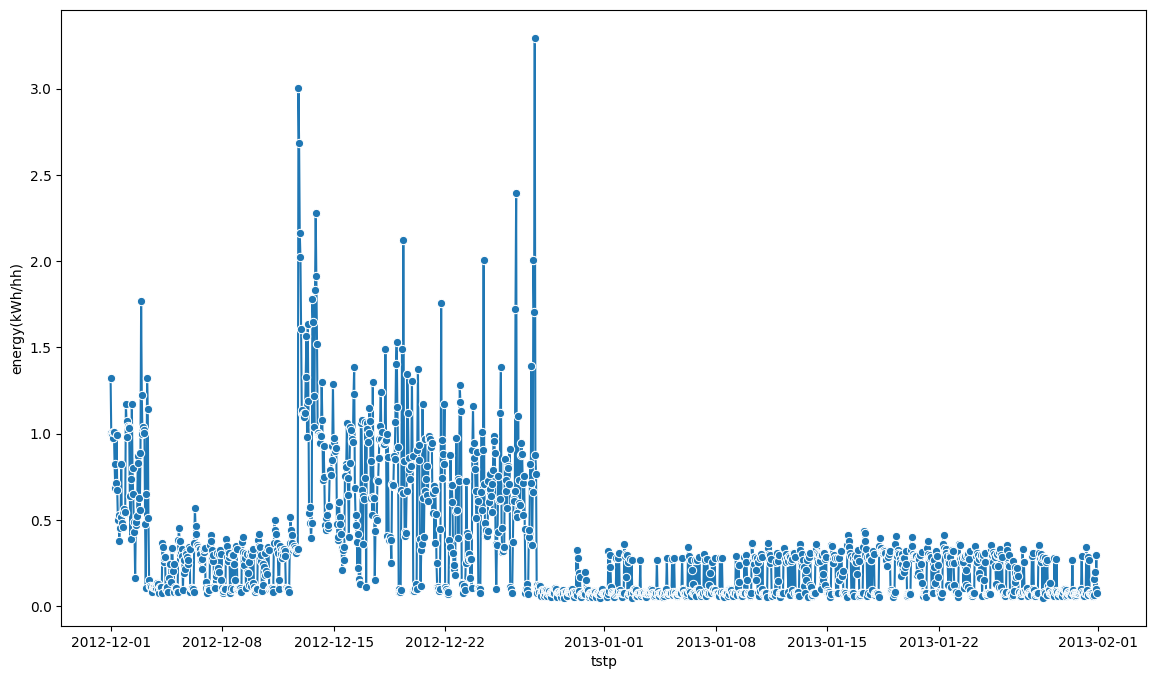

In [8]:
mask = (weird_household['tstp'] >= '2012-12-01 00:00:00') & (weird_household['tstp'] < '2013-01-31 23:00:00')

plt.figure(figsize=(14, 8))
sns.lineplot(data=weird_household.loc[mask], x='tstp', y='energy(kWh/hh)', marker='o')
plt.show()

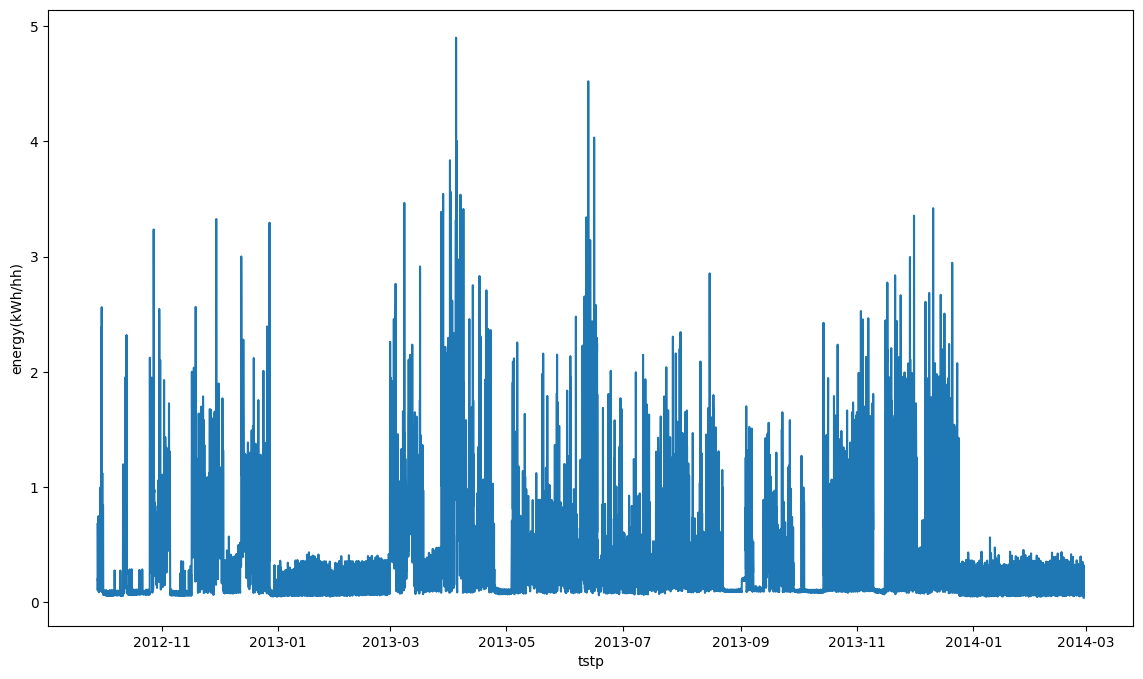

In [64]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=weird_household, x='tstp', y='energy(kWh/hh)')
plt.show()

In [162]:
weird_household['week_num'] = weird_household['tstp'].dt.isocalendar().week

C:\Users\Usrer\AppData\Local\Temp\ipykernel_17220\673114074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weird_household['week_num'] = weird_household['tstp'].dt.isocalendar().week


In [169]:
weird_household['energy(kWh/hh)'].mean()

0.3915610464394366

In [166]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(weird_household.groupby(['year', 'week_num'])['energy(kWh/hh)'].describe())

count      mean       std    min      25%     50%      75%  \
year week_num                                                               
2012 1          24.0  0.073917  0.013217  0.049  0.06725  0.0770  0.07900   
     39         64.0  0.478938  0.470147  0.086  0.13775  0.3800  0.67750   
     40        168.0  0.094417  0.088085  0.055  0.07175  0.0840  0.09000   
     41        168.0  0.228286  0.341045  0.055  0.07900  0.0860  0.13725   
     42        168.0  0.096048  0.040240  0.061  0.07900  0.0920  0.09700   
     43        168.0  0.429446  0.511106  0.064  0.08800  0.0965  0.76875   
     44        168.0  0.732899  0.408025  0.110  0.49575  0.7195  0.80200   
     45        168.0  0.130196  0.192467  0.056  0.07500  0.0780  0.08925   
     46        168.0  0.371179  0.501673  0.054  0.07600  0.0830  0.54650   
     47        168.0  0.629899  0.371803  0.079  0.36975  0.6165  0.90025   
     48        168.0  0.783250  0.467450  0.063  0.45175  0.7085  1.00650   
     49        168.0  0.249714  0.201777  0.075  0.10475  0.2280  0.32575   
     50        168.0  0.645095  0.527280  0.080  0.30875  0.4615  0.95200   
     51        168.0  0.652131  0.406885  0.070  0.30700  0.6735  0.94150   
     52        168.0  0.408792  0.482841  0.049  0.08100  0.1220  0.66025   
2013 1         192.0  0.129875  0.092303  0.049  0.07400  0.0790  0.17800   
     2         168.0  0.152667  0.101356  0.053  0.07575  0.0830  0.26575   
     3         168.0  0.215179  0.113447  0.053  0.07800  0.2665  0.30500   
     4         168.0  0.187613  0.108698  0.053  0.07800  0.1815  0.29225   
     5         168.0  0.137857  0.096943  0.048  0.07575  0.0790  0.25225   
     6         168.0  0.169000  0.104030  0.054  0.07800  0.1075  0.27450   
     7         168.0  0.166399  0.105287  0.056  0.08100  0.0920  0.28125   
     8         168.0  0.193232  0.114474  0.059  0.08300  0.1725  0.29800   
     9         168.0  0.551613  0.586172  0.064  0.12125  0.3075  0.72075   
     10        168.0  0.642994  0.458242  0.074  0.31250  0.6165  0.91525   
     11        168.0  0.817482  0.473475  0.071  0.48950  0.8650  1.01125   
     12        168.0  0.236970  0.165079  0.070  0.11400  0.1585  0.33425   
     13        168.0  0.757333  0.653624  0.082  0.29000  0.4895  1.06250   
     14        168.0  1.170512  0.890965  0.081  0.56875  0.9310  1.59525   
     15        168.0  0.574405  0.523490  0.081  0.19400  0.4525  0.80050   
     16        168.0  0.527923  0.525229  0.099  0.19600  0.3820  0.59000   
     17        168.0  0.203560  0.281182  0.069  0.09175  0.1040  0.17225   
     18        168.0  0.226625  0.355463  0.067  0.09000  0.0930  0.12500   
     19        168.0  0.365667  0.322608  0.075  0.13475  0.2410  0.48925   
     20        168.0  0.340500  0.258356  0.082  0.17000  0.2490  0.45575   
     21        168.0  0.411429  0.336058  0.071  0.11950  0.3250  0.59650   
     22        168.0  0.403762  0.375577  0.079  0.18700  0.2835  0.47550   
     23        168.0  0.356637  0.388561  0.078  0.12250  0.2585  0.40575   
     24        168.0  0.950006  0.821159  0.078  0.35575  0.6600  1.35825   
     25        168.0  0.370280  0.414620  0.060  0.15200  0.2250  0.40175   
     26        168.0  0.363560  0.346483  0.070  0.12625  0.2540  0.45175   
     27        168.0  0.299137  0.254789  0.067  0.12175  0.2360  0.37800   
     28        168.0  0.383452  0.361504  0.063  0.16475  0.2775  0.42250   
     29        168.0  0.380101  0.300137  0.071  0.19300  0.2710  0.45075   
     30        168.0  0.467220  0.445628  0.076  0.17600  0.3020  0.55975   
     31        168.0  0.469393  0.431990  0.088  0.17400  0.3180  0.57000   
     32        168.0  0.333292  0.279606  0.085  0.12900  0.2415  0.44650   
     33        168.0  0.425786  0.432534  0.081  0.12800  0.2570  0.54125   
     34        168.0  0.193506  0.203833  0.089  0.09500  0.1040  0.20325   
     35        168.0  0.102440  0.027302  0.087  0.09000  0.0930  0.09925   
     36    

# Preprocessing & Modelling

In [10]:
# get one of the household for simplicity

columns_dropped = [
    'windBearing', 'pressure'
]

singlehousehold_df = sampled_df.groupby(['LCLid'])
singlehousehold_df = singlehousehold_df.get_group('MAC003686')
singlehousehold_df = singlehousehold_df.drop(columns=columns_dropped, axis=1)
singlehousehold_df.shape

(11823, 22)

In [11]:
import math
from sklearn.preprocessing import LabelEncoder

# one hot encoding
# singlehousehold_df = singlehousehold_df.join(pd.get_dummies(singlehousehold_df[['precipType', 'Type']]))
# singlehousehold_df = singlehousehold_df.drop(['precipType', 'Type'], axis=1)

# label encoding
precip_encoder = LabelEncoder()
holiday_encoder = LabelEncoder()
singlehousehold_df['precipType'] = precip_labels = precip_encoder.fit_transform(singlehousehold_df['precipType'])
singlehousehold_df['Type'] = holiday_labels = holiday_encoder.fit_transform(singlehousehold_df['Type'])

# get the first 90% and forecast the remaining 10%, must be in order
cutoff_point = math.floor(singlehousehold_df.shape[0] * 0.9)
training_singlehousehold_df = singlehousehold_df.iloc[:cutoff_point]
testing_singlehousehold_df = singlehousehold_df.iloc[cutoff_point:]

X_train = training_singlehousehold_df.drop(['tstp', 'LCLid', 'stdorToU', 'Acorn', 'energy(kWh/hh)'], axis=1)
y_train = training_singlehousehold_df['energy(kWh/hh)']

X_test = testing_singlehousehold_df.drop(['tstp', 'LCLid', 'stdorToU', 'Acorn', 'energy(kWh/hh)'], axis=1)
y_test = testing_singlehousehold_df['energy(kWh/hh)']

print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape: (10640, 17)
X test shape: (1183, 17)
y train shape: (10640,)
y test shape: (1183,)



### References for modelling in Tensorflow
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/  

Can try:
1. Encoder-Decoder
2. CNN-LSTM
3. ConvLSTM


### Univariate 

In [176]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [177]:
n_steps_in = 24
n_steps_out = 24

trainX, trainY = split_sequence(y_train.values, n_steps_in, n_steps_out)
testX, testY = split_sequence(y_test.values, n_steps_in, n_steps_out)

trainX.shape, trainY.shape

((10593, 24), (10593, 24))

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Dropout, Flatten, RepeatVector, TimeDistributed

tf.random.set_seed(42)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mape', patience=3)

model = Sequential([
    LSTM(64, input_shape=(n_steps_in, 1), return_sequences=True),
    TimeDistributed(Dense(64, activation='relu')),
    TimeDistributed(Dense(1, kernel_regularizer='l1'))
])

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    trainX,
    trainY,
    validation_split=0.1,
    epochs=20,
    callbacks=[earlystop]
)

Epoch 1/20
298/298 [==============================] - 7s 24ms/step - loss: 0.3067 - mae: 0.3474 - mse: 0.2778 - mape: 66.9887 - val_loss: 0.3860 - val_mae: 0.3899 - val_mse: 0.3757 - val_mape: 45.8502
Epoch 2/20
298/298 [==============================] - 7s 25ms/step - loss: 0.2746 - mae: 0.3392 - mse: 0.2671 - mape: 65.5397 - val_loss: 0.3672 - val_mae: 0.3820 - val_mse: 0.3612 - val_mape: 46.0061
Epoch 3/20
298/298 [==============================] - 7s 25ms/step - loss: 0.2684 - mae: 0.3341 - mse: 0.2633 - mape: 63.7399 - val_loss: 0.3585 - val_mae: 0.3835 - val_mse: 0.3542 - val_mape: 47.9512
Epoch 4/20
298/298 [==============================] - 8s 26ms/step - loss: 0.2628 - mae: 0.3301 - mse: 0.2588 - mape: 62.5995 - val_loss: 0.3754 - val_mae: 0.3846 - val_mse: 0.3721 - val_mape: 45.0429
Epoch 5/20
298/298 [==============================] - 8s 26ms/step - loss: 0.2594 - mae: 0.3271 - mse: 0.2561 - mape: 61.7747 - val_loss: 0.3639 - val_mae: 0.3822 - val_mse: 0.3605 - val_mape: 46.

In [179]:
y_pred = model.predict(testX)
model.evaluate(testX, testY)

36/36 [==============================] - 1s 15ms/step - loss: 0.2886 - mae: 0.3158 - mse: 0.2857 - mape: 31.1911


[0.2886074483394623,
 0.31579816341400146,
 0.2857387363910675,
 31.191076278686523]

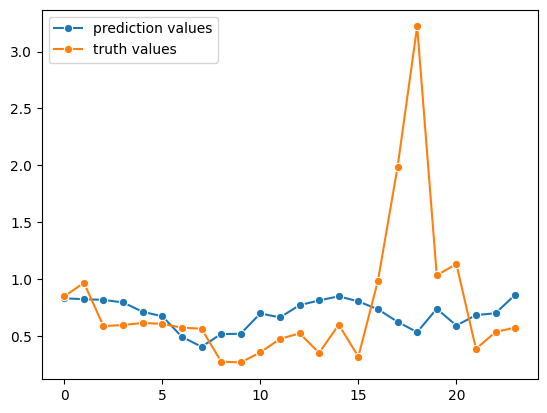

In [199]:
timesteps = np.arange(0, 24)

sns.lineplot(x=timesteps, y=y_pred[0].reshape(-1), label='prediction values', marker='o')
sns.lineplot(x=timesteps, y=testY[0].reshape(-1), label='truth values', marker='o')
plt.show()

In [19]:
testY

array([[0.968     , 0.587     , 0.59599996, ..., 0.535     , 0.574     ,
        0.809     ],
       [0.587     , 0.59599996, 0.615     , ..., 0.574     , 0.809     ,
        1.01      ],
       [0.59599996, 0.615     , 0.606     , ..., 0.809     , 1.01      ,
        1.15      ],
       ...,
       [0.89199996, 0.829     , 0.804     , ..., 1.13      , 1.128     ,
        1.1229999 ],
       [0.829     , 0.804     , 0.825     , ..., 1.128     , 1.1229999 ,
        1.375     ],
       [0.804     , 0.825     , 0.811     , ..., 1.1229999 , 1.375     ,
        0.435     ]])

### Multi-step Multivariate LSTM with Encoder-Decoder Model

In [190]:
# split a multivariate sequence into samples (this is for encoder-decoder models)
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
        
	return np.array(X), np.array(y)

In [192]:
X_train.columns

Index(['visibility', 'temperature', 'dewPoint', 'apparentTemperature',
       'windSpeed', 'precipType', 'humidity', 'Type', 'year', 'month', 'day',
       'dayofweek_num', 'is_weekend', 'season', 'no_work', 'hour', 'at_home'],
      dtype='object')

In [194]:
from numpy import hstack
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['hour']
scaled_X_train = scaler.fit_transform(pd.concat([X_train[features], y_train], axis=1))
scaled_X_test = scaler.fit_transform(pd.concat([X_test[features], y_test], axis=1))

n_steps_in = 24 # use 3 previous steps
n_steps_out = 24 # forecast next 3 step

train_dataset = hstack((scaled_X_train, np.expand_dims(y_train.values, axis=1)))
trainX, trainY = split_sequences(train_dataset, n_steps_in, n_steps_out)

test_dataset = hstack((scaled_X_test, np.expand_dims(y_test.values, axis=1)))
testX, testY = split_sequences(test_dataset, n_steps_in, n_steps_out)

trainX.shape, trainY.shape

((10594, 24, 2), (10594, 24))

In [195]:
testX.shape, testY.shape

((1137, 24, 2), (1137, 24))

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, LSTM, RepeatVector, 
    TimeDistributed, Conv1D, MaxPooling1D, 
    Flatten, GRU, Dropout, 
    Normalization, Bidirectional, BatchNormalization
)

tf.random.set_seed(42)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mape', patience=3)

model = Sequential([

    LSTM(24, input_shape=(n_steps_out, 2), return_sequences=True),
    TimeDistributed(Dense(24, activation='relu')),
    TimeDistributed(Dense(1, kernel_regularizer='l1'))
])

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    trainX,
    trainY,
    epochs=50,
    validation_split=0.2, 
    callbacks=[earlystop]
)

Epoch 1/50
265/265 [==============================] - 7s 24ms/step - loss: 0.2999 - mae: 0.3264 - mse: 0.2692 - mape: 60.2499 - val_loss: 0.3293 - val_mae: 0.3796 - val_mse: 0.3148 - val_mape: 55.9527
Epoch 2/50
265/265 [==============================] - 6s 24ms/step - loss: 0.2564 - mae: 0.3083 - mse: 0.2448 - mape: 57.1833 - val_loss: 0.3244 - val_mae: 0.3861 - val_mse: 0.3150 - val_mape: 59.7159
Epoch 3/50
265/265 [==============================] - 6s 24ms/step - loss: 0.2482 - mae: 0.3050 - mse: 0.2402 - mape: 56.5533 - val_loss: 0.3296 - val_mae: 0.3838 - val_mse: 0.3229 - val_mape: 57.2361
Epoch 4/50
265/265 [==============================] - 7s 25ms/step - loss: 0.2421 - mae: 0.3017 - mse: 0.2360 - mape: 55.8520 - val_loss: 0.3268 - val_mae: 0.3785 - val_mse: 0.3216 - val_mape: 55.6021
Epoch 5/50
265/265 [==============================] - 7s 25ms/step - loss: 0.2383 - mae: 0.2988 - mse: 0.2332 - mape: 55.2785 - val_loss: 0.3341 - val_mae: 0.3977 - val_mse: 0.3292 - val_mape: 62.

In [198]:
model.evaluate(testX, testY)

36/36 [==============================] - 1s 15ms/step - loss: 0.3622 - mae: 0.4092 - mse: 0.3577 - mape: 38.3780


[0.36220329999923706,
 0.4092492461204529,
 0.35774150490760803,
 38.37799072265625]

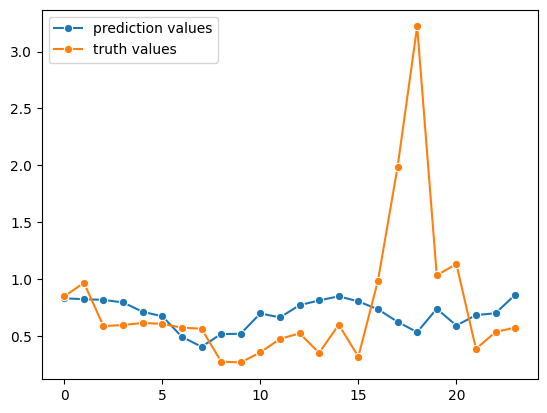

In [200]:
timesteps = np.arange(0, 24)

sns.lineplot(x=timesteps, y=y_pred[0].reshape(-1), label='prediction values', marker='o')
sns.lineplot(x=timesteps, y=testY[0].reshape(-1), label='truth values', marker='o')
plt.show()

### Residual Blocks Encoder-Decoder Architecture

### Try new method
- https://www.sciencedirect.com/science/article/pii/S0952197621004516
- https://stackoverflow.com/questions/64792460/how-to-code-a-residual-block-using-two-layers-of-a-basic-cnn-algorithm-built-wit
- https://www.sciencedirect.com/science/article/pii/S0306261919301217

In [147]:
from numpy import hstack
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
load_scaler = StandardScaler()

features_columns = ['visibility', 'temperature', 'dewPoint', 'Type',
       'apparentTemperature', 'windSpeed', 'precipType', 'humidity', 'no_work', 'hour', 'at_home']
temporal_features = ['year', 'month', 'day', 'dayofweek_num', 'is_weekend', 'season']

scaled_features_train = features_scaler.fit_transform(X_train[features_columns])
scaled_features_train = pd.DataFrame(scaled_features_train, columns=features_columns)

scaled_features_test = features_scaler.transform(X_test[features_columns])
scaled_features_test = pd.DataFrame(scaled_features_test, columns=features_columns)

n_steps_in = 168 # use 3 previous steps
n_steps_out = 24 # forecast next 3 step

# training set
load_dataset_train = hstack((load_scaler.fit_transform(np.expand_dims(y_train, axis=1)), np.expand_dims(y_train.values, axis=1)))
features_dataset_train = hstack((scaled_features_train, np.expand_dims(y_train.values, axis=1)))
temporal_dataset_train = hstack((X_train[temporal_features], np.expand_dims(y_train.values, axis=1)))
load_X_train, load_y_train = split_sequences(load_dataset_train, n_steps_in, n_steps_out)
features_X_train, _ = split_sequences(features_dataset_train, n_steps_in, n_steps_out)
temporal_X_train, _ = split_sequences(temporal_dataset_train, n_steps_in, n_steps_out)

# testing set
load_dataset_test = hstack((load_scaler.transform(np.expand_dims(y_test, axis=1)), np.expand_dims(y_test.values, axis=1)))
features_dataset_test = hstack((scaled_features_test, np.expand_dims(y_test.values, axis=1)))
temporal_dataset_test = hstack((X_test[temporal_features], np.expand_dims(y_test.values, axis=1)))
load_X_test, load_y_test = split_sequences(load_dataset_test, n_steps_in, n_steps_out)
features_X_test, _ = split_sequences(features_dataset_test, n_steps_in, n_steps_out)
temporal_X_test, _ = split_sequences(temporal_dataset_test, n_steps_in, n_steps_out)

load_X_train.shape, load_y_train.shape

((10450, 168, 1), (10450, 24))

In [148]:
features_X_train.shape

(10450, 168, 11)

In [149]:
temporal_X_train.shape

(10450, 168, 6)

In [150]:
load_X_test.shape, load_y_test.shape

((993, 168, 1), (993, 24))

In [151]:
features_X_test.shape

(993, 168, 11)

In [152]:
temporal_X_test.shape

(993, 168, 6)

In [118]:
# function to build residual blocks
def resblock(x, kernelsize, filters):
    fx = Conv1D(filters, kernelsize, activation='relu', padding='same')(x)
    fx = LSTM(64, return_sequences=True)(fx)
    fx = LSTM(32, return_sequences=True)(fx)
    fx = Conv1D(filters, kernelsize, padding='same')(fx)
    out = Add()([x,fx])
    out = ReLU()(out)
    
    return out

In [174]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, LSTM, RepeatVector, 
    TimeDistributed, Conv1D, MaxPooling1D, 
    Flatten, GRU, Dropout, 
    Normalization, Bidirectional, BatchNormalization,
    Concatenate, Input, Add, ReLU
)

tf.random.set_seed(42)
tf.config.run_functions_eagerly(True)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mape', patience=3)

features_input = Input(shape=(n_steps_in, 11))
load_input = Input(shape=(n_steps_in, 1))
temporal_input = Input(shape=(1, 7))

cnn1 = Conv1D(
    filters=64,
    kernel_size=4
)(load_input)
cnn2 = Conv1D(
    filters=32,
    kernel_size=3
)(cnn1)

cnn3 = Conv1D(
    filters=64,
    kernel_size=4
)(features_input)
cnn4 = Conv1D(
    filters=32,
    kernel_size=3
)(cnn3)

# cnn5 = Conv1D(
#     filters=64,
#     kernel_size=1
# )(temporal_input)
# cnn6 = Conv1D(
#     filters=32,
#     kernel_size=1
# )(cnn5)

concatenation = Concatenate()([cnn2, cnn4])
# resblock1 = resblock(concatenation, 64, 1)

flatten = Flatten()(concatenation)
repeat_vector = RepeatVector(n_steps_out)(flatten)
lstm1 = LSTM(128, return_sequences=True)(repeat_vector)
dropout1 = Dropout(0.2)(lstm1)

fc1 = TimeDistributed(Dense(50, activation='relu', kernel_regularizer='l1'))(dropout1)
output = TimeDistributed(Dense(1))(fc1)
model = Model(inputs=[load_input, features_input], outputs=output)

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae', 'mse', 'mape']
)

In [159]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 168, 1)]     0           []                               
                                                                                                  
 input_46 (InputLayer)          [(None, 168, 11)]    0           []                               
                                                                                                  
 conv1d_105 (Conv1D)            (None, 165, 64)      320         ['input_47[0][0]']               
                                                                                                  
 conv1d_107 (Conv1D)            (None, 165, 64)      2880        ['input_46[0][0]']               
                                                                                            

In [175]:
history = model.fit(
    (load_X_train, features_X_train),
    load_y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[earlystop]
)

Epoch 1/50
262/262 [==============================] - 10s 39ms/step - loss: 0.7139 - mae: 0.3510 - mse: 0.3828 - mape: 48.5640 - val_loss: 0.5181 - val_mae: 0.4407 - val_mse: 0.4939 - val_mape: 41.7493
Epoch 2/50
262/262 [==============================] - 10s 39ms/step - loss: 0.4117 - mae: 0.3308 - mse: 0.3563 - mape: 42.5188 - val_loss: 0.5306 - val_mae: 0.4471 - val_mse: 0.4991 - val_mape: 42.7200
Epoch 3/50
262/262 [==============================] - 11s 43ms/step - loss: 0.4119 - mae: 0.3302 - mse: 0.3553 - mape: 42.4895 - val_loss: 0.5357 - val_mae: 0.4550 - val_mse: 0.5179 - val_mape: 42.2999
Epoch 4/50
262/262 [==============================] - 10s 40ms/step - loss: 0.4134 - mae: 0.3347 - mse: 0.3669 - mape: 42.3521 - val_loss: 0.5219 - val_mae: 0.4467 - val_mse: 0.5028 - val_mape: 42.0988


In [173]:
model.evaluate((load_X_test, features_X_test), load_y_test)

32/32 [==============================] - 1s 17ms/step - loss: 1.0117 - mae: 0.4324 - mse: 0.4261 - mape: 38.1727


[1.011684536933899, 0.4324416518211365, 0.42612311244010925, 38.1727180480957]

 1/32 [..............................] - ETA: 0s

C:\Users\Usrer\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 0s 14ms/step


<AxesSubplot: >

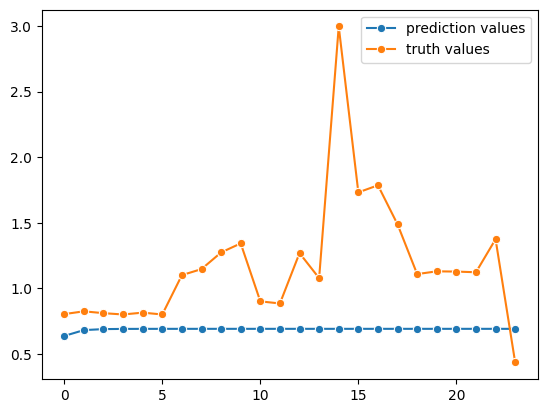

In [170]:
y_pred = model.predict((load_X_test, features_X_test))

sns.lineplot(x=np.arange(0, n_steps_out), y=y_pred[-1].reshape(-1), label='prediction values', marker='o')
sns.lineplot(x=np.arange(0, n_steps_out), y=testY[-1].reshape(-1), label='truth values', marker='o')

<AxesSubplot: >

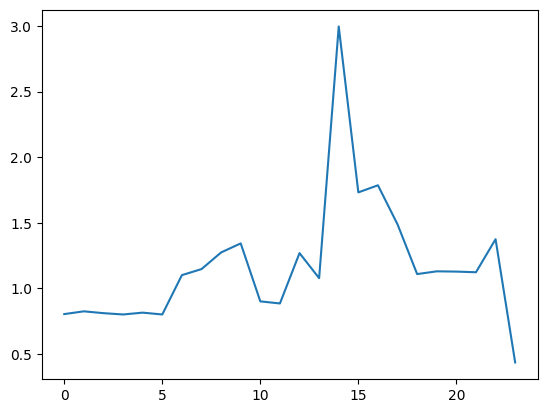

### Evaluation

In [ ]:
# compare the forecasted 7 steps with the 7 steps in test
# find the 7 steps in test and compare with the forecasted 7 steps

# Some Notes

### How to train models across different households?
1. Can separate model by ACORN groups.
2. Find households with similar electricity usage pattern, group them and separate model by the group.
3. Exactly how to train: pre-process to generate sequences for each household (make sure the sequences are correct), then append to the overall dataset and train the model with that data.
4. Can try data clustering